# Road Safety Data for the UK

#### The Data
The [files](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) provide detailed road safety data about the circumstances of personal injury road accidents in GB, the types (including Make and Model) of vehicles involved and the consequential casualties. The statistics relate only to personal injury accidents on public roads that are reported to the police, and subsequently recorded, using the STATS19 accident reporting form. The files used here span 2013 to 2017.

#### The Task
The purpose of the analysis is 
- To summarize the main characteristics of the data, and obtain interesting facts that are worth highlighting.
- Identity and quantify associations (if any) between the number of causalities (in the Accidents table) and other variables in the data set.
- Explore whether it is possible to predict accident hotspots based on the data.

#### The OSEMiN-approach

The OSEMiN Process is an acronym that rhymes with “awesome” and stands for **Obtain, Scrub, Explore, Model, and iNterpret**. It can be used as a blueprint for working on data problems using machine learning tools. Preprocessing involves scrubbing (also called cleaning) and exploring the data. Building the model, evaluating, and optimizing it make up the process of machine learning.

# Table of Contents
<a id='Table of Contents'></a>

### <a href='#1. Obtaining and Viewing the Data'>1. Obtaining and Viewing the Data</a>

### <a href='#2. Preprocessing the Data'>2. Preprocessing the Data</a>

* <a href='#2.1. Handling Date and Time'>2.1. Handling Date and Time</a>
* <a href='#2.2. Handling Missing Values'>2.2. Handling Missing Values</a>
* <a href='#2.3. Merging Dataframes'>2.3. Merging Dataframes</a>
* <a href='#2.4. Handling Numerical Data'>2.4. Handling Numerical Data</a>
* <a href='#2.5. Dimensionality Reduction using Feature Selection'>2.5. Dimensionality Reduction using Feature Selection</a>
* <a href='#2.6. Handling Categorical Data'>2.6. Handling Categorical Data</a>

### <a href='#3. Modeling the Data'>3. Modeling the Data</a>

* <a href='#3.1. Preprocessing Target and Features'>3.1. Preprocessing Target and Features</a>
* <a href='#3.2. Random Forest Classifier'>3.2. Random Forest Classifier</a>
* <a href='#3.3. Support Vector Classification'>3.3. Support Vector Classification</a>

### 1. Obtaining and Viewing the Data
<a id='1. Obtaining and Viewing the Data'></a>

In [92]:
# import the usual suspects ...
import pandas as pd
import numpy as np
import glob

import matplotlib.pyplot as plt
import seaborn as sns

# suppress all warnings
import warnings
warnings.filterwarnings("ignore")

**Accidents 2013-2017**

*To get some ideas on how to elegantly read in multiple files in pandas, check this [link](https://medium.com/@kadek/elegantly-reading-multiple-csvs-into-pandas-e1a76843b688).*

In [93]:
accidents = pd.concat([pd.read_csv(f, compression='zip', 
                                   low_memory=False) for f in glob.glob('data/*Accidents*.zip')])
print('Records:', accidents.shape[0], '\nColumns:', accidents.shape[1])
accidents.head(3)

Records: 691641 
Columns: 32


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,0,0,4,1,1,0,0,1,1,E01002825
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,0,0,1,1,1,0,0,1,1,E01002820
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,0,1,4,2,2,0,0,1,1,E01002833


In [94]:
#accidents.info()

The combined accidents table that now spans 5 years contains almost 692.000 records and 32 columns, with only very few missing values. If we decided to work with date and/or time, we will need to convert the string values into datetime format. Besides that, almost all data is properly stored as numeric data.

**Casualties 2013-2017**

In [95]:
# renaming the Accident_Index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Casualties_2013.zip', compression='zip', index=False)

In [96]:
casualties = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Casualties*.zip')], 
                       sort=True)
print('Records:', casualties.shape[0], '\nColumns:', casualties.shape[1])
casualties.head(3)

Records: 916713 
Columns: 16


,Accident_Index,Age_Band_of_Casualty,Age_of_Casualty,Bus_or_Coach_Passenger,Car_Passenger,Casualty_Class,Casualty_Home_Area_Type,Casualty_IMD_Decile,Casualty_Reference,Casualty_Severity,Casualty_Type,Pedestrian_Location,Pedestrian_Movement,Pedestrian_Road_Maintenance_Worker,Sex_of_Casualty,Vehicle_Reference
0,201301BS70003,7,NaN,0,0,1,1,NaN,1,2,1,0,0,0,1,2
1,201301BS70005,6,NaN,0,0,1,1,NaN,1,3,3,0,0,0,2,1
2,201301BS70005,4,NaN,0,0,3,1,NaN,2,3,0,1,1,2,2,1


In [97]:
#casualties.info()

The combined casualties table has roughly 917,000 with 16 columns providing detailed information about the casualties. The data is almost complete, with missing values only in the `age_of_casualty` and `Casualty_IMD_Decile` columns. Apart from the index, all data is stored in a numeric format.

**Vehicles 2013-2017**

In [98]:
# renaming the Accident_Index column in one of our tables
#df = pd.read_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip')
#df = df.rename(columns={'Acc_Index': 'Accident_Index'})
#df.to_csv('data/dftRoadSafetyData_Vehicles_2013.zip', compression='zip', index=False)

In [99]:
vehicles = pd.concat([pd.read_csv(f, compression='zip') for f in glob.glob('data/*Vehicles*.zip')], 
                     sort=True)
print('Records:', vehicles.shape[0], '\nColumns:', vehicles.shape[1])
vehicles.head(3)

Records: 1270711 
Columns: 23


,1st_Point_of_Impact,Accident_Index,Age_Band_of_Driver,Age_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_(CC),Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,...,Sex_of_Driver,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_IMD_Decile,Vehicle_Leaving_Carriageway,Vehicle_Location-Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive?
0,1,201301BS70003,8,NaN,10,1,8,2402,0,0,...,1,0,0,NaN,0,0,6,1,8,1
1,1,201301BS70003,7,NaN,-1,1,8,-1,0,0,...,1,0,0,NaN,0,0,18,2,1,1
2,1,201301BS70005,6,NaN,5,1,4,124,0,0,...,2,0,0,NaN,0,0,18,1,3,1


In [100]:
#vehicles.info()

The vehicles table is the largest of all three and contains roughly 1.270.000 records spanned over 23 columns with detailed information about the vehicle and its driver. We face missing values in the exact same columns as before: `Age_of_Driver` as well as `Vehicle_IMD_Decile`.

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 2. Preprocessing the Data
<a id='2. Preprocessing the Data'></a>

#### 2.1. Handling Date and Time
<a id='2.1. Handling Date and Time'></a>

We had our `Date` columnwith values not properly stored in the correct format. Let's do this now:

In [101]:
accidents['Date']= pd.to_datetime(accidents['Date'], format="%d/%m/%Y")

In [102]:
# check
accidents.iloc[:, 5:13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691641 entries, 0 to 138659
Data columns (total 8 columns):
Police_Force                  691641 non-null int64
Accident_Severity             691641 non-null int64
Number_of_Vehicles            691641 non-null int64
Number_of_Casualties          691641 non-null int64
Date                          691641 non-null datetime64[ns]
Day_of_Week                   691641 non-null int64
Time                          691610 non-null object
Local_Authority_(District)    691641 non-null int64
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 47.5+ MB


In [103]:
accidents.iloc[:, 5:13].head(2)

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District)
0,1,3,1,1,2015-01-12,2,18:45,12
1,1,3,1,1,2015-01-12,2,07:50,12


Next, let's define a new column that groups the `Time` the accidents happened into one of five options:
- Morning
- Afternoon
- Rush_Hour
- Evening
- Night

In [104]:
# slice first and second string from time column
accidents['Hour'] = accidents['Time'].str[0:2]

# convert new column to numeric datetype
accidents['Hour'] = pd.to_numeric(accidents['Hour'])

# drop null values in our new column
accidents = accidents.dropna(subset=['Hour'])

# cast to integer values
accidents['Hour'] = accidents['Hour'].astype('int')

In [105]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [106]:
# apply thus function to our temporary hour column
accidents['Daytime'] = accidents['Hour'].apply(when_was_it)
accidents[['Time', 'Hour', 'Daytime']].head(8)

,Time,Hour,Daytime
0,18:45,18,rush_hour (16-19)
1,07:50,7,morning (5-11)
2,18:08,18,rush_hour (16-19)
3,07:40,7,morning (5-11)
4,07:30,7,morning (5-11)
5,09:56,9,morning (5-11)
6,09:09,9,morning (5-11)
7,15:30,15,afternoon (11-16)


In [107]:
# drop old time column and temporary hour column
accidents = accidents.drop(columns=['Time', 'Hour'])

#### 2.2. Handling Missing Values
<a id='2.2. Handling Missing Values'></a>

In [108]:
print('Proportion of Missing Values in Accidents Table:', 
      round(accidents.isna().sum().sum()/len(accidents),3), '%')

Proportion of Missing Values in Accidents Table: 0.063 %


In [109]:
accidents = accidents.dropna()

# check if we have no NaN's anymore
accidents.isna().sum().sum()

0

In [110]:
print('Proportion of Missing Values in Casualties Table:', 
      round(casualties.isna().sum().sum()/len(casualties),3), '%')

Proportion of Missing Values in Casualties Table: 0.613 %


In [111]:
print('Proportion of Missing Values in Vehicles Table:', 
      round(vehicles.isna().sum().sum()/len(vehicles),3), '%')

Proportion of Missing Values in Vehicles Table: 0.609 %


The last two dataframes have far too many missing values to even think about dropping them. But the first one only contains 6% missing values and it might be helpful to not mess up later analysis with NaN's. Let's drop them:

In [112]:
accidents.shape

(648155, 32)

In [113]:
#accidents.info()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.3. Merging Dataframes
<a id='2.3. Merging Dataframes'></a>

In [114]:
# combine the accidents with the vehicles table
df = pd.merge(accidents[['Accident_Index', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties', 
                         'Day_of_Week', 'Local_Authority_(District)', 'Light_Conditions', 
                         'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                         'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Daytime']], 
              vehicles[['Accident_Index', 'Age_Band_of_Driver', 'Age_of_Vehicle', 
                        'Engine_Capacity_(CC)', 'Sex_of_Driver', 'Vehicle_Type']], 
              on='Accident_Index')
#accidents:'LSOA_of_Accident_Location', 'Date', 'Time'

df.isna().sum().sum()

0

In [115]:
#df.info()    

In [116]:
# cast categorical features - currently stored as string data - to their proper data format
for col in ['Accident_Severity', 'Day_of_Week',  'Local_Authority_(District)', 'Light_Conditions', 
            'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
            'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Daytime', 'Age_Band_of_Driver', 'Sex_of_Driver',
            'Vehicle_Type']:
    df[col] = df[col].astype('category')
    
#df.info()

In [117]:
cat_cols = ['Accident_Severity', 'Day_of_Week', 'Local_Authority_(District)', 'Light_Conditions', 
                'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                'Carriageway_Hazards', 'Urban_or_Rural_Area', 'Daytime', 'Age_Band_of_Driver',  
                'Sex_of_Driver', 'Vehicle_Type']

num_cols = ['Number_of_Vehicles', 'Number_of_Casualties', 'Age_of_Vehicle', 'Engine_Capacity_(CC)']

cols = cat_cols + num_cols
    
df_model = df[cols].copy()

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.4. Handling Numerical Data 
<a id='2.4. Handling Numerical Data'></a>

*Detecting Outliers*

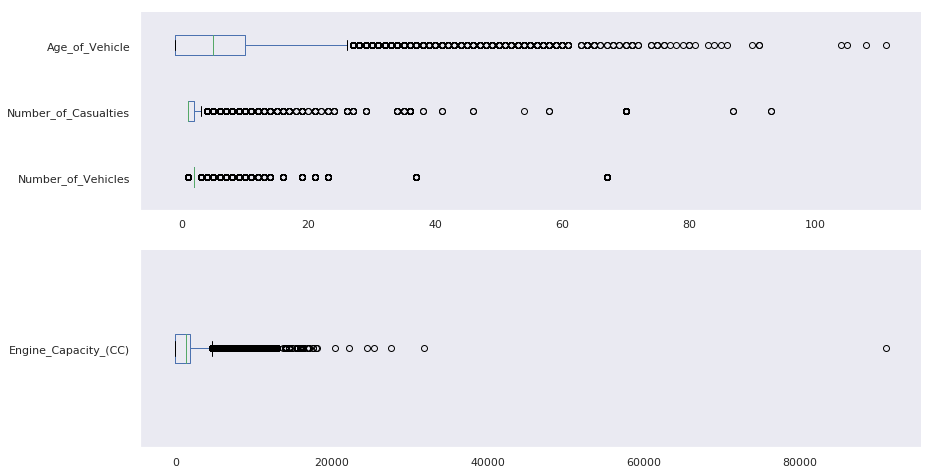

In [118]:
# plotting boxplots
sns.set(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,8))

df_model.boxplot(column=['Number_of_Vehicles', 'Number_of_Casualties', 'Age_of_Vehicle'], 
                 grid=False, vert=False, ax=ax1)
df_model.boxplot(column=['Engine_Capacity_(CC)'], grid=False, vert=False, ax=ax2)
sns.despine(top=True, right=True, left=False, bottom=False);

In [119]:
df_model.shape

(1129207, 17)

*Handling outliers by dropping them*

In [120]:
# phrasing conditions
cond_1 = df_model['Age_of_Vehicle'] < 23 
cond_2 = df_model['Age_of_Vehicle'] > 0
cond_3 = df_model['Number_of_Casualties'] < 10.0
cond_4 = df_model['Number_of_Vehicles'] < 5.0
cond_5 = df_model['Engine_Capacity_(CC)'] < 20000.0
cond_6 = df_model['Engine_Capacity_(CC)'] > 0

# combining all conditions
conditions = cond_1 & cond_2 & cond_3 & cond_4 & cond_5 & cond_6

# keep only records that meet our conditions and don't fall within extreme outliers
df_model = df_model[conditions]

In [121]:
df_model.shape

(782996, 17)

*Feature Scaling*

Tree based models are not distance based models and can handle varying ranges of features. Hence, scaling is not required while modelling trees.

In [122]:
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

# transform numerical features
#df_model[num_cols] = scaler.fit_transform(df_model[num_cols])
#df_model = pd.merge(df_model[num_cols], df_model[cat_cols], left_index=True, right_index=True)
#round(df_model[num_cols].mean())

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.5. Dimensionality Reduction using Feature Selection
<a id='2.5. Dimensionality Reduction using Feature Selection'></a>

We'll start reducing the dimensionality of our feature matrix by selecting high-quality, informative features and dropping less useful features. This approach is called feature selection.

*1. Thresholding Numerical Feature Variance*

In [123]:
# import library
from sklearn.feature_selection import VarianceThreshold

In [124]:
# create thresholder
thresholder = VarianceThreshold(threshold=0.7)

# create high vaiance feature matrix
feature_high_variance = thresholder.fit_transform(df_model[num_cols])

# View first 2 rows with features with variances above threshold
#feature_high_variance[0:2]

# view variances
#thresholder.fit(features_num).variances_

# view shape of matrix
#feature_high_variance.shape

In [125]:
useful_columns = [column for column in df_model[num_cols].columns 
                  if column in df_model[num_cols].columns[thresholder.get_support()]]

not_useful_columns = [column for column in df_model[num_cols].columns 
                      if column not in df_model[num_cols].columns[thresholder.get_support()]]

#useful_columns
not_useful_columns

['Number_of_Vehicles']

In [126]:
num_cols = useful_columns
cols = num_cols + cat_cols
df_model = df_model[cols]
df_model.shape

(782996, 16)

*2. Handling Highly Correlated Features*

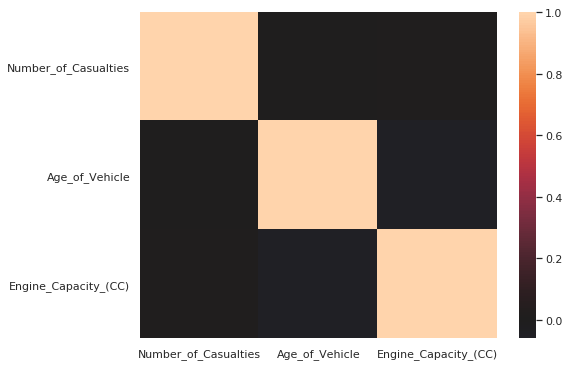

In [127]:
# use heatmap to check for intercorrelation between variables
plt.figure(figsize=(8,6))
sns.heatmap(df_model[num_cols].corr(), center=0);

In [128]:
# no multicollinearity --> no need to do anything

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 2.6. Handling Categorical Data
<a id='2.6. Handling Categorical Data'></a>

*Encoding categorical features*

In [131]:
# create dummy variables from the categorical features
dummies = pd.get_dummies(df_model[cat_cols], drop_first=True)
df_model = pd.concat([df_model, dummies], axis=1)
df_model.shape

Index(['Number_of_Casualties', 'Age_of_Vehicle', 'Engine_Capacity_(CC)',
       'Accident_Severity', 'Day_of_Week', 'Local_Authority_(District)',
       'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site',
       ...
       'Vehicle_Type_17', 'Vehicle_Type_18', 'Vehicle_Type_19',
       'Vehicle_Type_20', 'Vehicle_Type_21', 'Vehicle_Type_22',
       'Vehicle_Type_23', 'Vehicle_Type_90', 'Vehicle_Type_97',
       'Vehicle_Type_98'],
      dtype='object', length=443)

*Handling Imbalanced Classes*

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
### 3. Modeling the Data
<a id='3. Modeling the Data'></a>

#### 3.5. Training a Decision Tree Classifier 
<a id='3.5. Training a Decision Tree Classifier'></a>

In [46]:
# define our target
target = df_model[['Accident_Severity']]

# define our features ...
features = df_model.drop(['Accident_Severity'], axis=1)

In [47]:
target.shape

(1129207, 1)

In [48]:
features.shape

(1129207, 456)

In [180]:
features_cat.columns

Index(['Day_of_Week', 'Local_Authority_(District)', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Age_Band_of_Driver', 'Sex_of_Driver',
       'Vehicle_Type'],
      dtype='object')

In [181]:
features_cat.Light_Conditions.value_counts()

 1    834220
 4    220010
 6     51194
 7     17423
 5      6341
-1        19
Name: Light_Conditions, dtype: int64

In [195]:
#features_cat.drop(features_cat[(features_cat.Light_Conditions == -1)].index,axis=0, inplace=True)
#features_cat.Light_Conditions.value_counts()

In [40]:
#df['Sex_of_Driver'].value_counts()

In [41]:
# drop ???
df.drop(df[(df['Sex_of_Driver']==3)  | (df['Sex_of_Driver']==-1) | \
           (df['Engine_Capacity_(CC)']==-1) | (df['Engine_Capacity_(CC)'] < 100)].index, axis=0, inplace=True)

In [42]:
#df.info()

In [43]:
# cast categorical features to their proper data format
for col in ['Accident_Severity','Day_of_Week', 'Road_Type', 'Speed_limit', 'Light_Conditions', 
            'Weather_Conditions','Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Sex_of_Driver']:
    df[col] = df[col].astype('category')

In [44]:


# create dummy variables
features = pd.get_dummies(features)

In [38]:
# split our data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [46]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import svm

# import metrics
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# import Grid Search
from sklearn.model_selection import GridSearchCV

In [47]:
# split our data 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [48]:
# scale our data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.2. Random Forest Classifier 
<a id='4.2. Random Forest Classifier'></a>

In [49]:
# instantiate the plain classifier
forest = RandomForestClassifier()

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest = accuracy_score(y_test, test_preds)
report_forest_1 = classification_report(y_test, test_preds)

print("Plain Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Plain Random Forest
-------------------------
Training Accuracy: 98.11%
Test Accuracy:     81.0%


In [50]:
print('Classification Report Plain Random Forest: \n', report_forest_1)

Classification Report Plain Random Forest: 
               precision    recall  f1-score   support

           1       0.06      0.02      0.03      1547
           2       0.21      0.11      0.14     17707
           3       0.86      0.94      0.89    108858

   micro avg       0.81      0.81      0.81    128112
   macro avg       0.38      0.35      0.35    128112
weighted avg       0.76      0.81      0.78    128112



In [ ]:
# create grid              
param_grid = {'n_estimators': [80, 100, 120],
              'criterion': ['gini', 'entropy'],
              'max_features': [5, 7, 9],         
              'max_depth': [5, 8, 10], 
              'min_samples_split': [2, 3, 4]}

# instantiate grid search
forest_grid_search = GridSearchCV(forest, param_grid, cv=3)

# train
forest_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(forest_grid_search.best_params_)

In [50]:
# instantiate random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=80, criterion='gini', max_features=7, 
                                      max_depth=10, min_samples_split=4)

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds  = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest  = accuracy_score(y_test, test_preds)
report_forest_2 = classification_report(y_test, test_preds)

print("Tuned Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Tuned Random Forest
-------------------------
Training Accuracy: 84.96%
Test Accuracy:     84.66%


In [54]:
print('Classification Report Tuned Random Forest: \n', report_forest_2)

Classification Report Tuned Random Forest: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1573
           2       0.50      0.00      0.00     18080
           3       0.85      1.00      0.92    108459

   micro avg       0.85      0.85      0.85    128112
   macro avg       0.45      0.33      0.31    128112
weighted avg       0.79      0.85      0.78    128112



*Back to: <a href='#Table of Contents'> Table of Contents</a>*
#### 4.3. Balancing the Data
<a id='4.3. Balancing the Data'></a>

https://calremmel.github.io/fraud-detection-part-one.html

In [52]:
from imblearn.over_sampling import SMOTE

In [54]:
# view previous class distribution
print(target['Accident_Severity'].value_counts()) 

# resample data ONLY using training data
X_resampled, y_resampled = SMOTE().fit_sample(X_train, y_train) 

# view synthetic sample class distribution
print(pd.Series(y_resampled).value_counts())

3    543781
2     88820
1      7959
Name: Accident_Severity, dtype: int64
3    434923
2    434923
1    434923
dtype: int64


In [55]:
# then perform ususal train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=0)

In [56]:
# instantiate random forest with the best found parameters
forest = RandomForestClassifier(n_estimators=80, criterion='gini', max_features=7, 
                                      max_depth=10, min_samples_split=4)

# train
forest.fit(X_train, y_train)

# predict
train_preds = forest.predict(X_train)
test_preds  = forest.predict(X_test)

# evaluate
train_accuracy_forest = accuracy_score(y_train, train_preds)
test_accuracy_forest  = accuracy_score(y_test, test_preds)
report_forest_3 = classification_report(y_test, test_preds)

print("Tuned and Balanced Random Forest")
print("-------------------------")
print(f"Training Accuracy: {(train_accuracy_forest * 100):.4}%")
print(f"Test Accuracy:     {(test_accuracy_forest * 100):.4}%")

Tuned and Balanced Random Forest
-------------------------
Training Accuracy: 54.9%
Test Accuracy:     54.67%


In [57]:
print('Classification Report Tuned Random Forest: \n', report_forest_3)

Classification Report Tuned Random Forest: 
               precision    recall  f1-score   support

           1       0.57      0.74      0.65    108767
           2       0.48      0.23      0.31    108851
           3       0.54      0.67      0.60    108575

   micro avg       0.55      0.55      0.55    326193
   macro avg       0.53      0.55      0.52    326193
weighted avg       0.53      0.55      0.52    326193



Success! Balancing our data has removed the bias towards the more prevalent class.